In [1]:
# Install necessary libraries
!pip install pydicom matplotlib requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.5 MB/s eta 0:00:00


In [9]:
import pydicom
import matplotlib.pyplot as plt
import requests
import os

# Using a sample DICOM file provided by the pydicom library for stability
# This avoids reliance on external URLs that may become unstable.
try:
    dicom_filepath = pydicom.data.get_testdata_file("CT_small.dcm")
    print(f"Using pydicom sample file: {dicom_filepath}")

    # Read the DICOM file
    ds = pydicom.dcmread(dicom_filepath)
    print(f"Successfully read DICOM file: {os.path.basename(dicom_filepath)}")
except Exception as e:
    print(f"Error loading pydicom sample file: {e}")
    # If the sample data is not found or readable, provide a fallback or instruct user
    print("Please ensure pydicom is installed correctly or provide a local DICOM file.")
    # Optionally, you could exit here if ds is critical for subsequent cells
    # exit()

Using pydicom sample file: /usr/local/lib/python3.12/dist-packages/pydicom/data/test_files/CT_small.dcm
Successfully read DICOM file: CT_small.dcm


### Visualize the DICOM Image

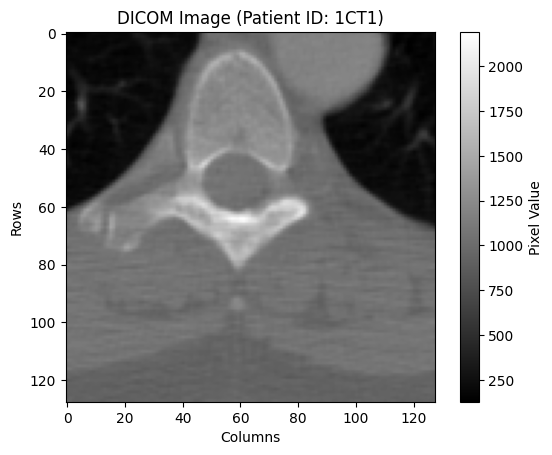

In [10]:
# Normalize pixel data if necessary (e.g., for 16-bit images to display properly)
if 'PixelData' in ds:
    if ds.PhotometricInterpretation == 'MONOCHROME1':
        # Invert the image if MONOCHROME1 (usually darkest pixel is highest value)
        plt.imshow(ds.pixel_array, cmap=plt.cm.gray_r)
    else:
        plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    plt.title(f"DICOM Image (Patient ID: {getattr(ds, 'PatientID', 'N/A')})")
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.colorbar(label='Pixel Value')
    plt.show()
else:
    print("No pixel data found in the DICOM file for visualization.")

### Display Relevant Metadata

In [11]:
print("DICOM Metadata:")
print("-----------------")

# Print selected common attributes
attributes_to_display = [
    'PatientName', 'PatientID', 'PatientSex', 'PatientAge',
    'StudyDescription', 'SeriesDescription', 'Modality', 'SOPInstanceUID',
    'StudyDate', 'SeriesDate', 'AcquisitionDate', 'ContentDate',
    'Rows', 'Columns', 'PixelSpacing', 'SliceThickness',
    'Manufacturer', 'ManufacturerModelName'
]

for attr in attributes_to_display:
    if hasattr(ds, attr):
        print(f"{attr}: {getattr(ds, attr)}")

print("\n--- All available DICOM tags ---")
# Alternatively, you can iterate through the entire dataset
for data_element in ds:
    if data_element.VR != 'SQ': # Exclude Sequence elements for brevity in this output
        print(f"({data_element.tag.group:04x},{data_element.tag.element:04x}) {data_element.name}: {data_element.value}")

DICOM Metadata:
-----------------
PatientName: CompressedSamples^CT1
PatientID: 1CT1
PatientSex: O
PatientAge: 000Y
StudyDescription: e+1
Modality: CT
SOPInstanceUID: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
StudyDate: 20040119
SeriesDate: 19970430
AcquisitionDate: 19970430
ContentDate: 19970430
Rows: 128
Columns: 128
PixelSpacing: [0.661468, 0.661468]
SliceThickness: 5.000000
Manufacturer: GE MEDICAL SYSTEMS
ManufacturerModelName: RHAPSODE

--- All available DICOM tags ---
(0008,0005) Specific Character Set: ISO_IR 100
(0008,0008) Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date: 20040119
(0008,0013) Instance Creation Time: 072731
(0008,0014) Instance Creator UID: 1.3.6.1.4.1.5962.3
(0008,0016) SOP Class UID: 1.2.840.10008.5.1.4.1.1.2
(0008,0018) SOP Instance UID: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0008,0020) Study Date: 20040119
(0008,0021) Series Date: 19970430
(0008,0022) Acquisition Date: 19970430
(0008,0023) Content Date: 199704